Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.  

**Задания**      
- Загрузите данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). 
- Изучите типы переменных.
- Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
- На каких платформах произошло больше всего релизов?
- Игры каких издателей (Publisher) встречаются в датасете чаще всего?
- В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
- Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. - Посмотрите на медиану, среднее, межквартильный размах.
- Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?  

**Описание данных**  
Имеются следующие поля:  
- Rank – место по объему продаж
- Name – название игры
- Platform – платформа, на которой выпущена игра
- Year – год релиза
- Genre – жанр
- Publisher – издатель
- NA_Sales – продажи в Северной Америке, в млн.
- EU_Sales – продажи в Европе, в млн.
- JP_Sales – продажи в Японии, в млн.
- Other_Sales – продажи в остальном мире, в млн.
- Global_Sales – продажи по всему миру, в млн.'''


1. Загрузить данные и убедиться, что всё считалось правильно:
посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.
В каком столбце встретилось больше всего пропущенных значений?
В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [4]:
import pandas as pd
import seaborn as sns
url = 'https://stepik.org/media/attachments/lesson/383837/games.csv'
df = pd.read_csv(url)

В каком столбце встретилось больше всего пропущенных значений?

In [5]:
s = df.isna().sum()
s = s[s != 0].sort_values(ascending=False)
s

Year         271
Publisher     58
dtype: int64

Удалите строки с пропущенными значениями из датасета.

In [6]:
df = df.dropna()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


3. Выведите описательные характеристики переменной Year 
и постройте график распределения количества выпущенных игр по годам.
Выберите верные утверждения:

In [13]:
#описательные статистики переменной
#В методе .describe() медиана помечается как 50% - потому что это фактически 50%-ый квантиль распределения
df.Year = df.Year.astype('int')
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
df.query('Year > 2007').shape[0]/df.shape[0]

0.4906390031305629

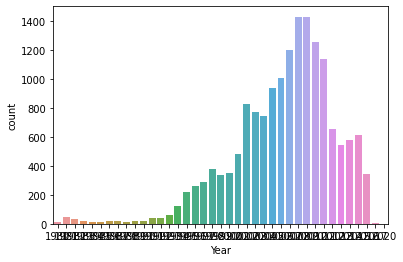

In [10]:
sns.countplot(df.Year)

In [17]:
# мода
from scipy import stats
stats.mode(df.Year)

ModeResult(mode=array([2009]), count=array([1431]))

- **Мода равна 2009**
- Мода равна 2007
- Медиана меньше, чем среднее
- **Медиана больше, чем среднее**

4. 
На каких платформах произошло больше всего релизов?  
Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%.  
Значения укажите в порядке убывания через запятую с пробелом   

In [20]:
platforms = df.Platform.value_counts(normalize=True).mul(100).to_frame('plt')
platforms.query('plt > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

5. Игры каких издателей (Publisher) встречаются в датасете чаще всего?  
В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [19]:
import scipy
scipy.stats.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

6. Сфокусируемся на играх от Nintendo.   
Посчитайте среднее, медиану  
и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other).  
В каком регионе медианное значение объема продаж является наибольшим?

In [23]:
df_nintendo = df.query('Publisher == "Nintendo"').describe(include='all')
df_nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696,696,696.00000,696,696,696.000000,696.000000,696.000000,696.000000,696.000000
unique,NaN,662,10,NaN,12,1,NaN,NaN,NaN,NaN,NaN
top,NaN,Monster Hunter Tri,DS,NaN,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,149,NaN,111,696,NaN,NaN,NaN,NaN,NaN
mean,3801.864943,NaN,NaN,2003.83046,NaN,NaN,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,NaN,NaN,7.77637,NaN,NaN,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,NaN,NaN,1983.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,NaN,NaN,2000.00000,NaN,NaN,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,NaN,NaN,2005.00000,NaN,NaN,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,NaN,NaN,2009.00000,NaN,NaN,0.972500,0.482500,0.740000,0.090000,2.262500



- EU (Europe)
- **NA (North America)**
- Global
- JP (Japan)
- Other

7. Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:
    - по оси x будет расположен жанр игры (Genre)
    - по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?  

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

Где на этом графике межквартильный размах?  
Это длина боксплота. Чем боксплот длиннее - там больше размах  

Где на этом графике медиана?  
Это черта внутри боксплота, делящая его тело на две части  


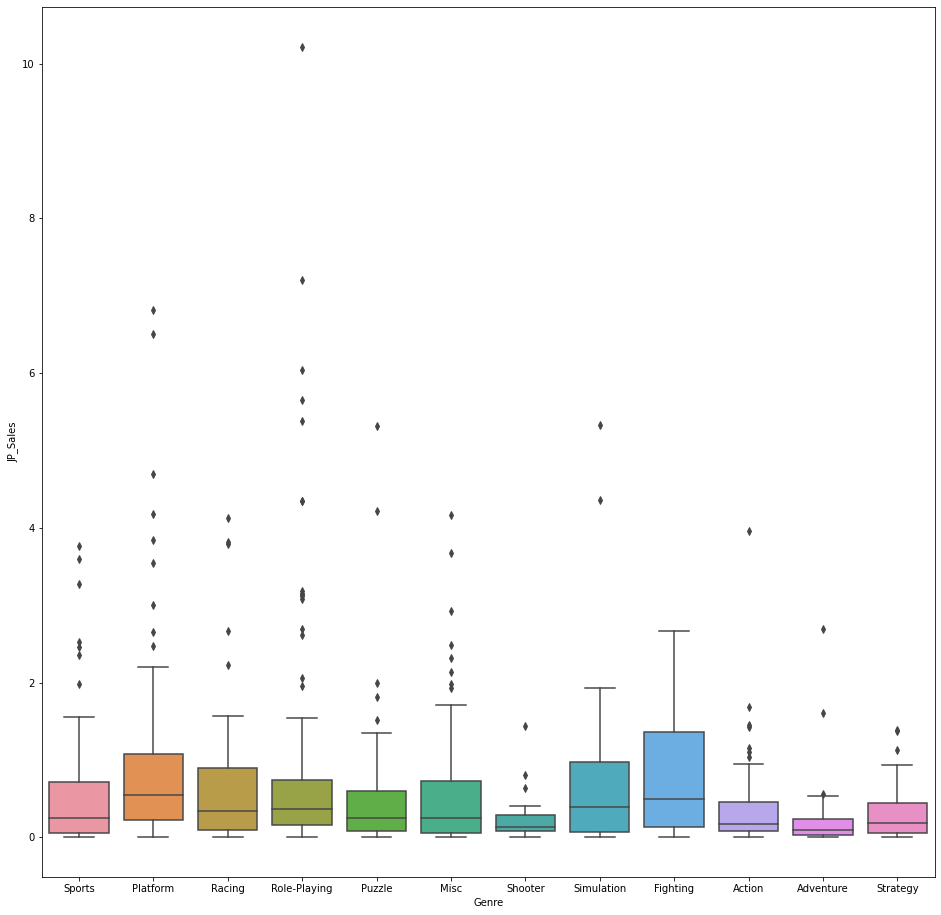

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
dd = df.query('Publisher == "Nintendo"').dropna()
sns.boxplot(x= dd.Genre, y= dd.JP_Sales)

- **Наибольший межквартильный размах наблюдается у игр жанра Fighting**
- **Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation**
- Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation
- Наибольший межквартильный размах наблюдается у игр жанра Role-Playing

8.
Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам 
для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.  
На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? 
Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.


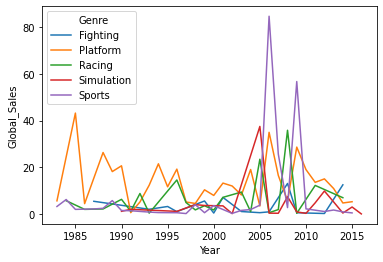

In [27]:
import plotly.express as px
dg = dd.query('Genre in("Fighting", "Simulation", "Platform", "Racing", "Sports")')
dg_sum = dg.groupby(['Genre', 'Year']).sum().reset_index()
sns.lineplot(x = dg_sum.Year, y = dg_sum.Global_Sales, hue = dg_sum.Genre)

- 1998 – 2014

- **2005 – 2010**

- 2009 – 2015

- 2005 – 2006